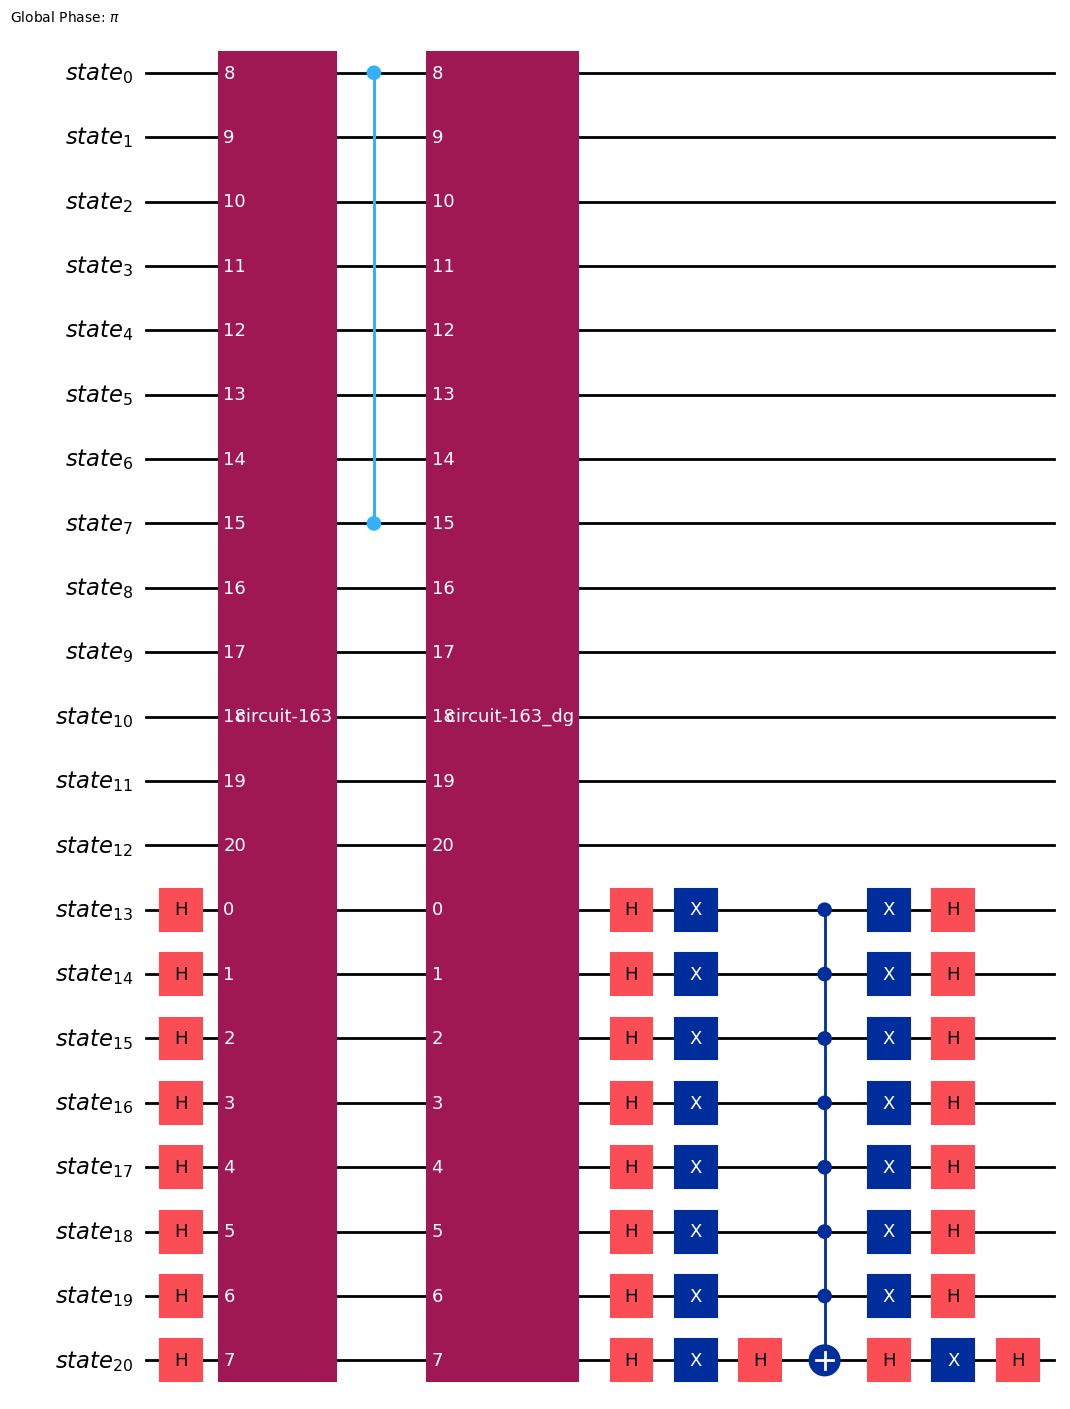

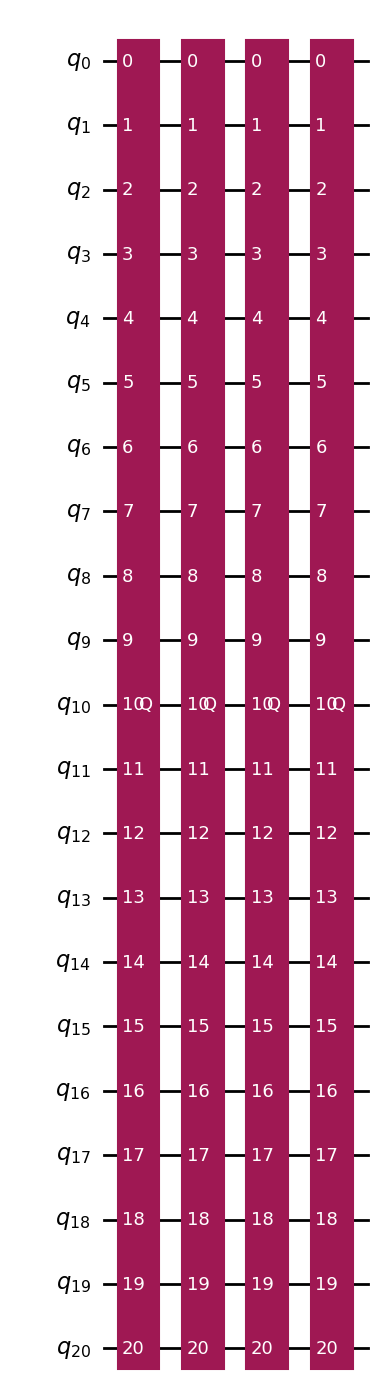

00000000|0.7051004668611103
01001110|0.02569525445869894
01111000|0.02569525445869886
10011100|0.025695254458698736
10110001|0.025695254458699066
11001001|0.02569525445869869
11010010|0.025695254458698975


In [1]:
import warnings
warnings.filterwarnings("ignore")


from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import GroverOperator
from hcd_clc_uncompute import create_hcd_clc_uncompute_oracle
import numpy as np
from numpy import pi
import math

# --- Quantum Registers ---
t = 6
threshold = 13 
precision = QuantumRegister(t, 't')        # Phase estimation qubits
cth_flag = QuantumRegister(1, 'cth_flag')          # Marking solutions which are under the threshold
hamiltonian_flag = QuantumRegister(1, 'hamiltonian_flag')
ancillary = QuantumRegister(5, 'ancillary')
cycle = QuantumRegister(8, 'C')            # Cycle qubits


hcd_clc_uncompute_oracle = create_hcd_clc_uncompute_oracle(threshold)
reflection_qubits = list(range(13, 21))
grover_op = GroverOperator(hcd_clc_uncompute_oracle, reflection_qubits= reflection_qubits)
display(grover_op.decompose().draw(output="mpl", style="iqp"))
qc = QuantumCircuit(grover_op.num_qubits)
qc.compose(grover_op.power(4), inplace=True)
display(qc.decompose().draw(output="mpl", style="iqp"))

backend = Aer.get_backend('statevector_simulator')
compiled = transpile(qc, backend)
result = backend.run(compiled).result()
state = result.get_statevector()

for i,amp in enumerate(state):
    bin_str = format(i, f'0{21}b')
    # print(bin_str)
    if abs(amp) ** 2 > .025:
        print(f"{bin_str[0:8]}|{abs(amp)**2}")

